<a href="https://colab.research.google.com/github/chaitanyamhaiskar/Data-Analysis/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ML+01+Logistic+Regession+Dataset+1.csv')


In [ ]:
from tabulate import tabulate
def basicDataInfo(df):
    # Display the first 5 rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the last 5 rows of the DataFrame
    print("Last 5 rows of the DataFrame:")
    print(tabulate(df.tail(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the shape of the DataFrame (number of rows and columns)
    shape_info = pd.DataFrame({"Number of Rows": [df.shape[0]], "Number of Columns": [df.shape[1]]})
    print("DataFrame shape:")
    print(tabulate(shape_info, headers='keys', tablefmt='rounded_outline'))

    #Display the null values if present:
    missing_values_info = df.isna().sum().to_frame(name="Number of Missing Values")
    print("Missing Values Summary:")
    print(tabulate(missing_values_info, headers='keys', tablefmt='rounded_outline'))

    # Display the number of duplicated rows in the DataFrame
    num_duplicates = df.duplicated().sum()
    tab = pd.DataFrame({'Duplicate Values':[num_duplicates]})
    print(tabulate(tab,headers='keys',tablefmt = 'rounded_outline'))


    # Display Nunique() values:
    nunique_vals = df.nunique().reset_index()
    nunique_vals.columns = ['Column', 'UniqueCount']
    # Display the number of unique values for each column
    print("Number of Unique Values per Column:")
    print(tabulate(nunique_vals, headers='keys', tablefmt='rounded_outline'))
    print()

    # Display Data Types()
    info = df.dtypes.reset_index()
    info.columns = ['Column','Data Type']
    print('Data types -> ')
    print(tabulate(info,headers = 'keys',tablefmt='rounded_outline'))
    print(df.dtypes.value_counts())

    # Describe function
    des = df.describe()
    print('Aggregate Values of The Data Set')
    print(tabulate(des,headers = 'keys',tablefmt = 'rounded_outline'))
    print()


In [ ]:
def find_outliers_IQR(df):
	outlier_indices = []
	df = df.select_dtypes(include = 'number')
	for col in df.columns:
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3-Q1
		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		outlier_list_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
		outlier_indices.extend(outlier_list_col)

	outlier_indices = list(set(outlier_indices))
	return df.iloc[outlier_indices]


In [ ]:
basicDataInfo(df)

First 5 rows of the DataFrame:
╭────┬──────┬───────┬─────────────┬───────────┬─────────────┬───────────┬───────────┬───────────────┬───────────┬─────────────────┬──────────────────┬────────────────────┬────────────────┬──────────────┬────────────────┬───────────┬─────────────┬───────────┬────────────────╮
│    │   Id │   Age │ Job         │ Marital   │ Education   │   Default │   Balance │   HHInsurance │   CarLoan │ Communication   │   LastContactDay │ LastContactMonth   │   NoOfContacts │   DaysPassed │   PrevAttempts │ Outcome   │ CallStart   │ CallEnd   │   CarInsurance │
├────┼──────┼───────┼─────────────┼───────────┼─────────────┼───────────┼───────────┼───────────────┼───────────┼─────────────────┼──────────────────┼────────────────────┼────────────────┼──────────────┼────────────────┼───────────┼─────────────┼───────────┼────────────────┤
│  0 │    1 │    32 │ management  │ single    │ tertiary    │         0 │      1218 │             1 │         0 │ telephone       │          

In [ ]:
df.drop(columns=['Id','LastContactDay','LastContactMonth','Outcome','Default','CarLoan','HHInsurance','Communication'],axis = 1,inplace = True)

In [ ]:
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])
df['CallDuration'] = df['CallEnd'] - df['CallStart']
df['CallDuration'] = df['CallDuration'].dt.total_seconds()

In [ ]:
px.imshow(df.corr(numeric_only=True),text_auto=True)

In [ ]:
df.groupby(['Age','Marital'])['CarInsurance'].sum().nlargest(15)

Age  Marital
30   single     40
29   single     38
32   single     38
28   single     35
46   married    34
27   single     33
31   single     33
34   married    33
25   single     32
38   married    32
39   married    32
37   married    31
33   married    30
36   married    30
43   married    30
Name: CarInsurance, dtype: int64

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

,Age,Job,Marital,Education,Balance,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,CallDuration
21,80,retired,married,secondary,8304,3,91,13,2024-05-12 17:37:41,2024-05-12 17:47:47,1,606.0
47,79,retired,divorced,primary,79,2,-1,0,2024-05-12 16:23:38,2024-05-12 16:42:04,1,1106.0
53,78,retired,married,NaN,3208,3,-1,0,2024-05-12 16:00:27,2024-05-12 16:06:18,1,351.0
328,77,retired,married,primary,29340,1,91,2,2024-05-12 16:50:53,2024-05-12 16:55:10,1,257.0
405,77,retired,married,NaN,992,2,182,2,2024-05-12 13:29:41,2024-05-12 13:32:08,0,147.0
743,77,retired,married,primary,2223,2,187,1,2024-05-12 13:43:11,2024-05-12 13:49:16,0,365.0
792,79,retired,divorced,secondary,631,5,182,3,2024-05-12 13:31:12,2024-05-12 13:38:32,0,440.0
849,80,retired,married,primary,155,1,93,2,2024-05-12 14:20:06,2024-05-12 14:24:56,1,290.0
1006,80,retired,married,primary,1021,1,-1,0,2024-05-12 11:10:53,2024-05-12 11:11:30,0,37.0
1206,75,retired,divorced,primary,37127,1,-1,0,2024-05-12 14:44:12,2024-05-12 14:52:37,0,505.0


In [ ]:
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])
df['Marital'] = np.where(df['Marital']=='divorced','single',df['Marital'])

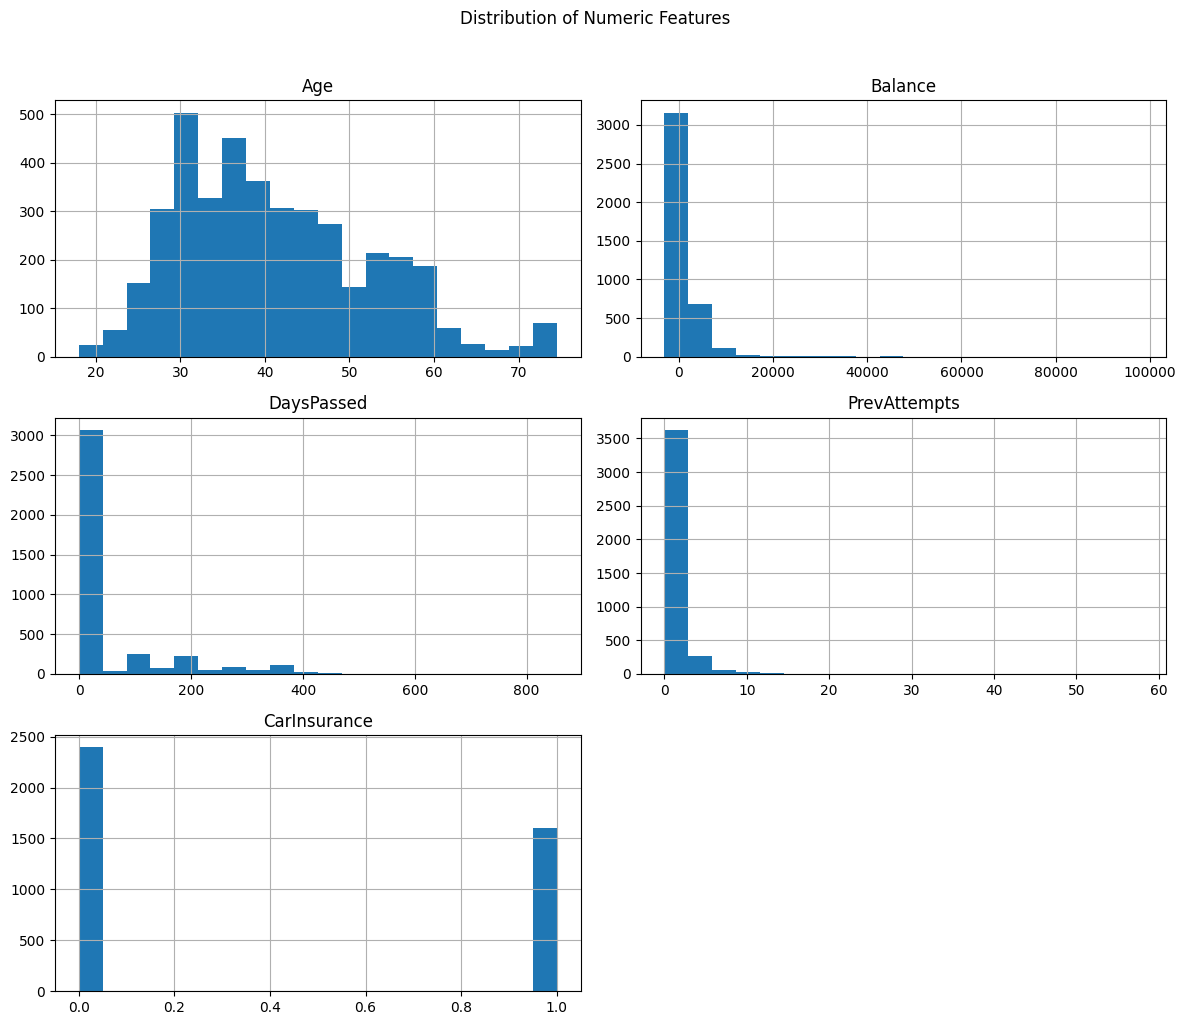

In [ ]:
numeric_features = ['Age', 'Balance', 'DaysPassed', 'PrevAttempts','CarInsurance']
df[numeric_features].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

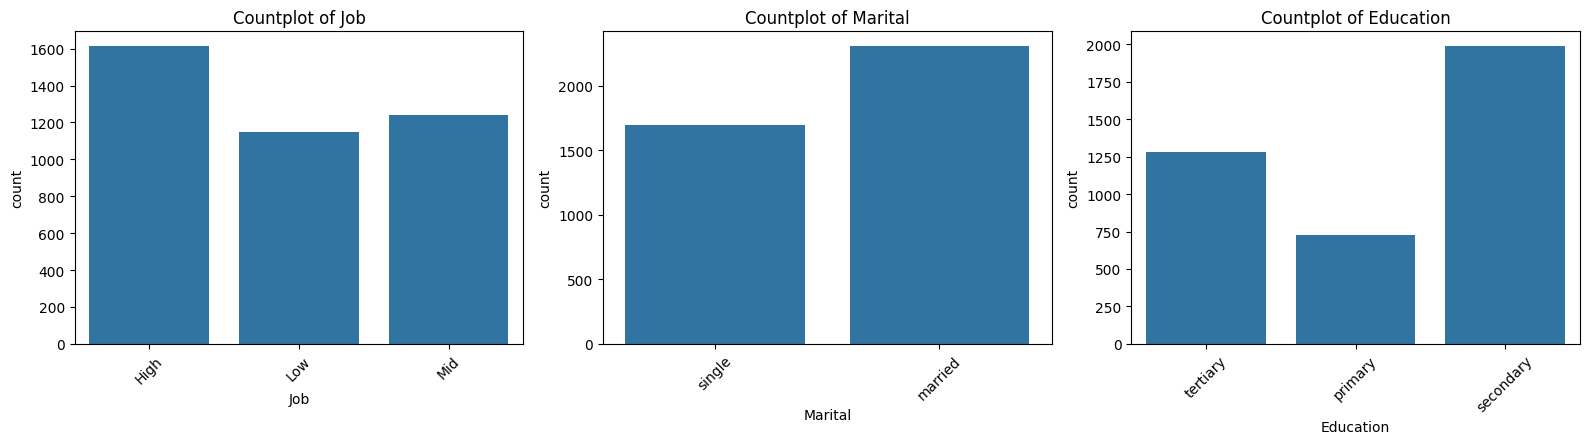

In [ ]:
categorical_features = ['Job', 'Marital', 'Education']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', nan, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [ ]:
def job_level(job_type):
  high_level_jobs = ['management', 'admin.', 'self-employed', 'entrepreneur']
  mid_level_jobs = ['technician', 'services', 'retired']
  other_jobs = ['blue-collar','student',None,'housemaid','unemployed']
  if job_type in high_level_jobs:
        return 'High'
  elif job_type in mid_level_jobs:
        return 'Mid'
  else:
        return 'Low'


In [ ]:
df['Job']=df['Job'].apply(job_level)

In [ ]:
basicDataInfo(df)

First 5 rows of the DataFrame:
╭────┬───────┬───────┬───────────┬─────────────┬───────────┬────────────────┬──────────────┬────────────────┬─────────────────────┬─────────────────────┬────────────────┬────────────────╮
│    │   Age │ Job   │ Marital   │ Education   │   Balance │   NoOfContacts │   DaysPassed │   PrevAttempts │ CallStart           │ CallEnd             │   CarInsurance │   CallDuration │
├────┼───────┼───────┼───────────┼─────────────┼───────────┼────────────────┼──────────────┼────────────────┼─────────────────────┼─────────────────────┼────────────────┼────────────────┤
│  0 │    32 │ High  │ single    │ tertiary    │      1218 │              2 │           -1 │              0 │ 2024-05-12 13:45:20 │ 2024-05-12 13:46:30 │              0 │             70 │
│  1 │    32 │ Low   │ married   │ primary     │      1156 │              5 │           -1 │              0 │ 2024-05-12 14:49:03 │ 2024-05-12 14:52:08 │              0 │            185 │
│  2 │    29 │ High  │ single

In [ ]:
df['Education']=df['Education'].fillna('primary')
df.groupby(['Education'])['Age'].mean()

Education
primary      46.330822
secondary    40.176811
tertiary     39.718409
Name: Age, dtype: float64

In [ ]:
# df['Education'] = np.where(df['Education'] == 'Nan' & df['Age'] >= 47,'primary',df['Education'])
# df['Education'] = np.where(df['Education'] == Null & df['Age'] >= 40,'secondary',df['Education'])
# df['Education'] = np.where(df['Education'] == None & df['Age'] <= 39,'tertiary',df['Education'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr = LogisticRegression()


In [ ]:
x = df.drop('CarInsurance',axis = 1)
y = df['CarInsurance']

In [ ]:
df_num = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')
df_dummy = pd.get_dummies(df_cat,drop_first=True,dtype = int)
data = pd.concat([df_num,df_dummy],axis = 1)
data.sample(3)

,Age,Balance,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,CallDuration,Job_Low,Job_Mid,Marital_single,Education_secondary,Education_tertiary
1008,58.0,32948,2,-1,0,2024-05-12 16:28:24,2024-05-12 16:34:28,0,364.0,0,1,0,1,0
3630,69.0,426,2,185,2,2024-05-12 13:13:05,2024-05-12 13:16:36,1,211.0,0,1,0,0,0
2047,34.0,462,3,-1,0,2024-05-12 13:23:18,2024-05-12 13:54:35,1,1877.0,0,0,1,0,1


In [ ]:
# data = data.drop(['CallStart','CallEnd'],axis = 1)
data

,Age,Balance,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration,Job_Low,Job_Mid,Marital_single,Education_secondary,Education_tertiary
0,32.0,1218,2,-1,0,0,70.0,0,0,1,0,1
1,32.0,1156,5,-1,0,0,185.0,1,0,0,0,0
2,29.0,637,1,119,1,1,340.0,0,0,1,0,1
3,25.0,373,2,-1,0,1,819.0,1,0,1,0,0
4,30.0,2694,1,-1,0,0,192.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28.0,0,1,40,2,1,269.0,0,1,1,0,1
3996,49.0,124,19,-1,0,0,125.0,0,0,1,1,0
3997,27.0,-400,1,-1,0,0,290.0,0,0,1,1,0
3998,36.0,658,1,227,3,0,99.0,0,0,1,0,1


In [ ]:
x= data.drop('CarInsurance', axis=1)
y = data['CarInsurance']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr = LogisticRegression()
x_train, x_test , y_train, y_test = train_test_split(x,y,train_size=.75,random_state = 5)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix,roc_curve,precision_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.742

In [ ]:
recall_score (y_test , y_pred)

0.6045340050377834

In [ ]:
f1_score(y_test , y_pred)

0.6504065040650406

In [ ]:
precision_score(y_test , y_pred)

0.7038123167155426

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       603
           1       0.70      0.60      0.65       397

    accuracy                           0.74      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.74      0.74      0.74      1000



In [ ]:
confusion_matrix(y_test,y_pred)

array([[502, 101],
       [157, 240]])

In [ ]:
(502+240)/(502+101+157+240)

0.742

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
auc_roc

0.8289492921621949

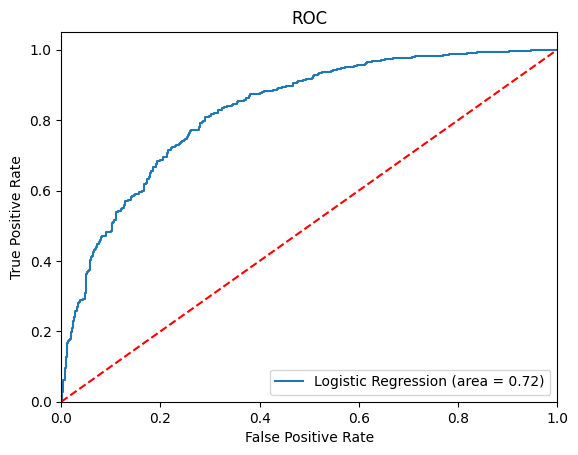

In [ ]:
logit_roc_auc = roc_auc_score(y_test,lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim((0.0,1.05))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)
y_pred = lr.predict(x_test2)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.757

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
kf = KFold(n_splits = 5)
score = cross_val_score(lr,x_train2,y_train,cv=kf)
print(score.mean())

0.7723333333333333


In [ ]:
skf = StratifiedKFold(n_splits = 5)
score = cross_val_score(lr,x_train2,y_train,cv = skf)
print(score.mean())

0.7739999999999999


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = [{'C':[0.001,0.01,0.1,0.15,0.02,0.03,1]}]
clf = GridSearchCV(lr,params)
clf.fit(x_train2,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1}
0.7739999999999999


In [ ]:
import statsmodels.api as sm
model = sm.Logit(y,x)
# res = logit_model.fit()
# print(res.summary())